# Part 5: Light GBM

### Objective

**Fit Model:** We will forecast the price of municipal green bonds on the "covid", "post_covid", and "full" dataset using *Light GBM*. To select the hyperparameters for our model, we will do time series cross validation on the training set. When doing this time series cross validation, we will when possible test the default hyperparameters against new hyperparameters. Sometimes, documentation on the tree model is not complete, and the exact default hyperparameter is not confidently known. Notice that we use a fixed seed when testing our hyperparameters and fitting our model. 

**Evaluate Forecast:** Once we have trained our model on the 80% of training data, we will test it against the 20% of testing data. We will plot the results of our forecasts for the "covid", "post covid", and "full" data sets. We will display the mean squared error (MSE), $r^2$, root mean squared error (RMSE), mean absolute error (MAE), and mean absolute percentage error (MAPE) of our forecats. 

**Explain Forecast:** Finally, we will use the "shap" package in python to plot various SHAP graphs, which will give us an explanation behind the drivers of our forecasted values over the testing set. 

In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import shap
import my_functions
shap.initjs()

## Default Parameters

- n_estimators: 100
- max_depth: -1 This means no limit on the depth of the tree.
- learning_rate = 0.1
- num_leaves: 31 (total number of leaves allowed in a tree)

Note: we also have to adjust num leaves when adjusting max depth. We want to set num_leaves <= 2^max_depth. By default the maximum number of leaves is 31. We only adjust num leaves when max_depth is postive.

Because of this contrivance, we will by default set our num_leaves parameter to 31. But this number can increase if the depth increases. But if the depth is unlimited, the num_leaves parameter will be 31. This is a slight error with the code, but the results should not change too much.

## Import Data

In [2]:
# import all data
df_covid = pd.read_excel("./cleaned_excel_data/covid_data.xlsx")
df_post_covid = pd.read_excel("./cleaned_excel_data/post_covid_data.xlsx")
df_full = pd.read_excel("./cleaned_excel_data/full_data.xlsx")

In [3]:
# covid data
X_covid = df_covid.drop(columns=['date', 'mgb_log_diff'])
y_covid = df_covid['mgb_log_diff']
# train test split
split_idx = int(0.8 * len(df_covid))
X_train_covid, X_test_covid = X_covid[:split_idx], X_covid[split_idx:]
y_train_covid, y_test_covid = y_covid[:split_idx], y_covid[split_idx:]


# post covid data
X_post_covid = df_post_covid.drop(columns=['date', 'mgb_log_diff'])
y_post_covid = df_post_covid['mgb_log_diff']
# train test split
split_idx = int(0.8 * len(df_post_covid))
X_train_post_covid, X_test_post_covid = X_post_covid[:split_idx], X_post_covid[split_idx:]
y_train_post_covid, y_test_post_covid = y_post_covid[:split_idx], y_post_covid[split_idx:]

# full data
X_full = df_full.drop(columns=['date', 'mgb_log_diff'])
y_full = df_full['mgb_log_diff']
# train test split
split_idx = int(0.8 * len(df_full))
X_train_full, X_test_full = X_full[:split_idx], X_full[split_idx:]
y_train_full, y_test_full = y_full[:split_idx], y_full[split_idx:]

## Find Optimal Parameters (Time Series Cross Validation)

In [4]:
param_grid = {
    'max_depth': [4, 6, 8, -1],
    'n_estimators' : [100, 150,200],
    'learning_rate':[0.05, 0.075, 0.1 ],
    'num_leaves': [31],
    'random_state': [1]
}

#### Covid Time Period

In [5]:
best_params_covid, best_mse_covid = my_functions.time_series_cv_tuning_lightgbm(X_train_covid, y_train_covid, param_grid, print_results = False)


Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.05, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 129.2142

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.075, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 143.9413

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.1, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 143.5393

Testing parameters: {'max_depth': 4, 'n_estimators': 150, 'learning_rate': 0.05, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 143.3282

Testing parameters: {'max_depth': 4, 'n_estimators': 150, 'learning_rate': 0.075, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 159.3602

Testing parameters: {'max_depth': 4, 'n_estimators': 150, 'learning_rate': 0.1, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 158.2795

Testing parameters: {'max_depth': 4, 'n_estimators': 200, 'learning_rate': 0.05, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 153.8500

Testing parameters: {'max_depth': 4, 'n_

#### Post Covid Time Period

In [6]:
best_params_post_covid, best_mse_post_covid = (
    my_functions.time_series_cv_tuning_lightgbm(X_train_post_covid, y_train_post_covid, param_grid, print_results = False)
)


Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.05, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 28.8564

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.075, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 29.6376

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.1, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 30.3704

Testing parameters: {'max_depth': 4, 'n_estimators': 150, 'learning_rate': 0.05, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 29.4676

Testing parameters: {'max_depth': 4, 'n_estimators': 150, 'learning_rate': 0.075, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 30.6378

Testing parameters: {'max_depth': 4, 'n_estimators': 150, 'learning_rate': 0.1, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 31.5704

Testing parameters: {'max_depth': 4, 'n_estimators': 200, 'learning_rate': 0.05, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 30.1338

Testing parameters: {'max_depth': 4, 'n_estimat

#### Full Time Period

In [7]:
best_params_full, best_mse_full = my_functions.time_series_cv_tuning_lightgbm(X_train_full, y_train_full, param_grid, print_results = False)


Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.05, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 113.5988

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.075, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 117.7641

Testing parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.1, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 125.0112

Testing parameters: {'max_depth': 4, 'n_estimators': 150, 'learning_rate': 0.05, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 118.8007

Testing parameters: {'max_depth': 4, 'n_estimators': 150, 'learning_rate': 0.075, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 122.5019

Testing parameters: {'max_depth': 4, 'n_estimators': 150, 'learning_rate': 0.1, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 130.2743

Testing parameters: {'max_depth': 4, 'n_estimators': 200, 'learning_rate': 0.05, 'num_leaves': 31, 'random_state': 1}
Avg MSE: 121.7773

Testing parameters: {'max_depth': 4, 'n_

## See Quality of Prediction 

We will use the optimal parameters to train the model

#### Covid Time Period

In [8]:
model_lightgbm_covid =  lgb.LGBMRegressor(verbosity=-1, n_jobs=1,  **best_params_covid)
model_lightgbm_covid.fit(X_train_covid, y_train_covid)

LGBMRegressor(learning_rate=0.05, max_depth=8, n_jobs=1, num_leaves=256,
              random_state=1, verbosity=-1)

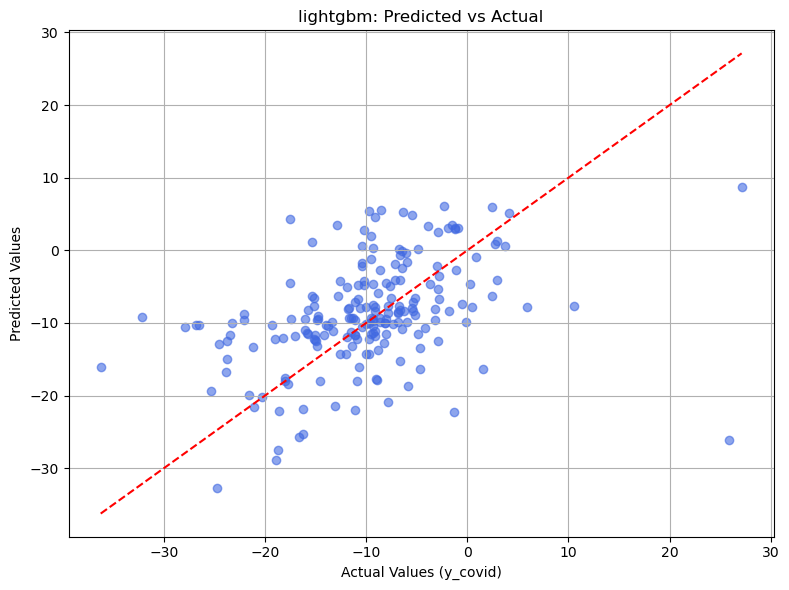

MSE of lightgbm: 70.7216
R squared of lightgbm: -0.0961
RMSE of lightgbm: 8.4096
MAE of lightgbm: 6.0639
MAPE of lightgbm: 1.49%


In [9]:
metrics = my_functions.evaluate_model_performance(model_lightgbm_covid, X_test_covid, y_test_covid, 
                                   model_name="lightgbm", target_name="y_covid")

#### Post Covid Time Period

In [10]:
model_lightgbm_post_covid =  lgb.LGBMRegressor(verbosity=-1, n_jobs=1,**best_params_post_covid)
model_lightgbm_post_covid.fit(X_train_post_covid, y_train_post_covid)

LGBMRegressor(learning_rate=0.05, n_jobs=1, random_state=1, verbosity=-1)

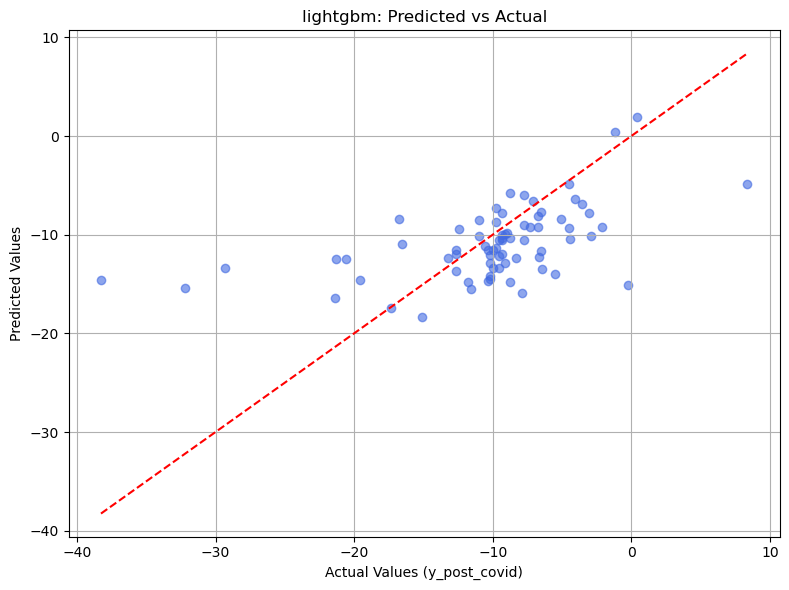

MSE of lightgbm: 34.6740
R squared of lightgbm: 0.2667
RMSE of lightgbm: 5.8885
MAE of lightgbm: 4.0992
MAPE of lightgbm: 1.27%


In [11]:
metrics = my_functions.evaluate_model_performance(model_lightgbm_post_covid, X_test_post_covid, y_test_post_covid, 
                                   model_name="lightgbm", target_name="y_post_covid")

#### Full Time Period

In [12]:
model_lightgbm_full = lgb.LGBMRegressor(verbosity=-1, n_jobs=1, **best_params_full)
model_lightgbm_full.fit(X_train_full, y_train_full)

LGBMRegressor(learning_rate=0.05, max_depth=6, n_jobs=1, num_leaves=64,
              random_state=1, verbosity=-1)

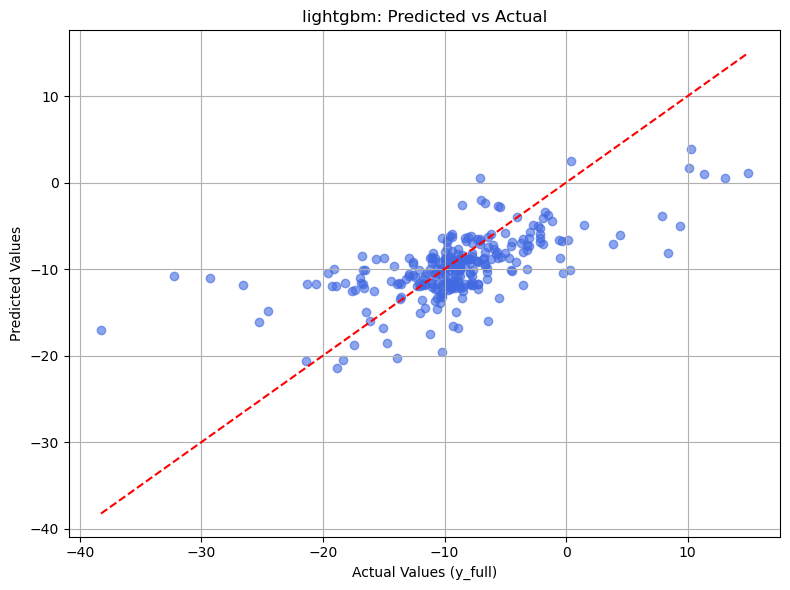

MSE of lightgbm: 23.3112
R squared of lightgbm: 0.4015
RMSE of lightgbm: 4.8282
MAE of lightgbm: 3.3778
MAPE of lightgbm: 1.05%


In [13]:
metrics = my_functions.evaluate_model_performance(model_lightgbm_full, X_test_full, y_test_full, 
                                   model_name="lightgbm", target_name="y_full")

## SHAP Plots

We will fit SHAP plots onto the test set.

#### Covid Time Period

1. Beeswarm plot


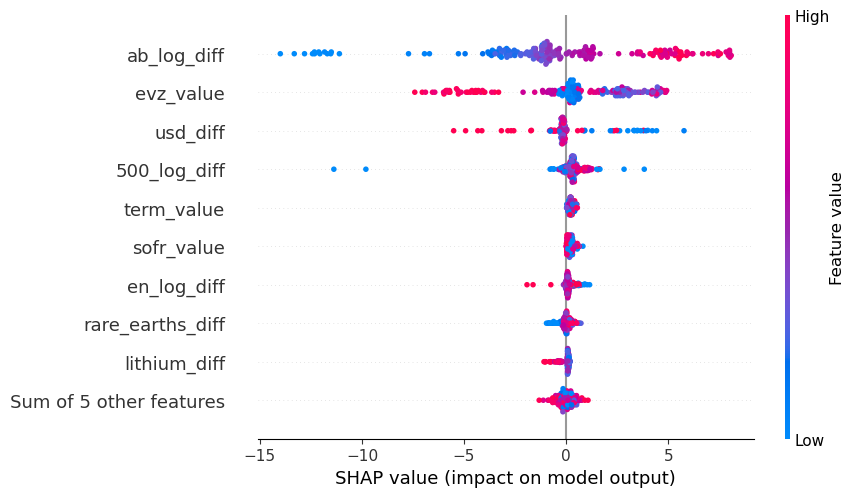

2. Feature importance bar plot


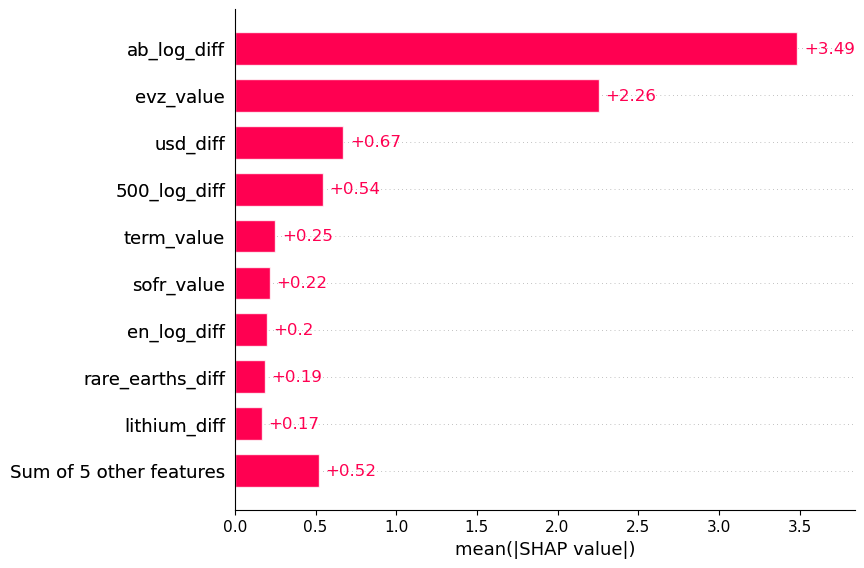

3. Dependence plots grid


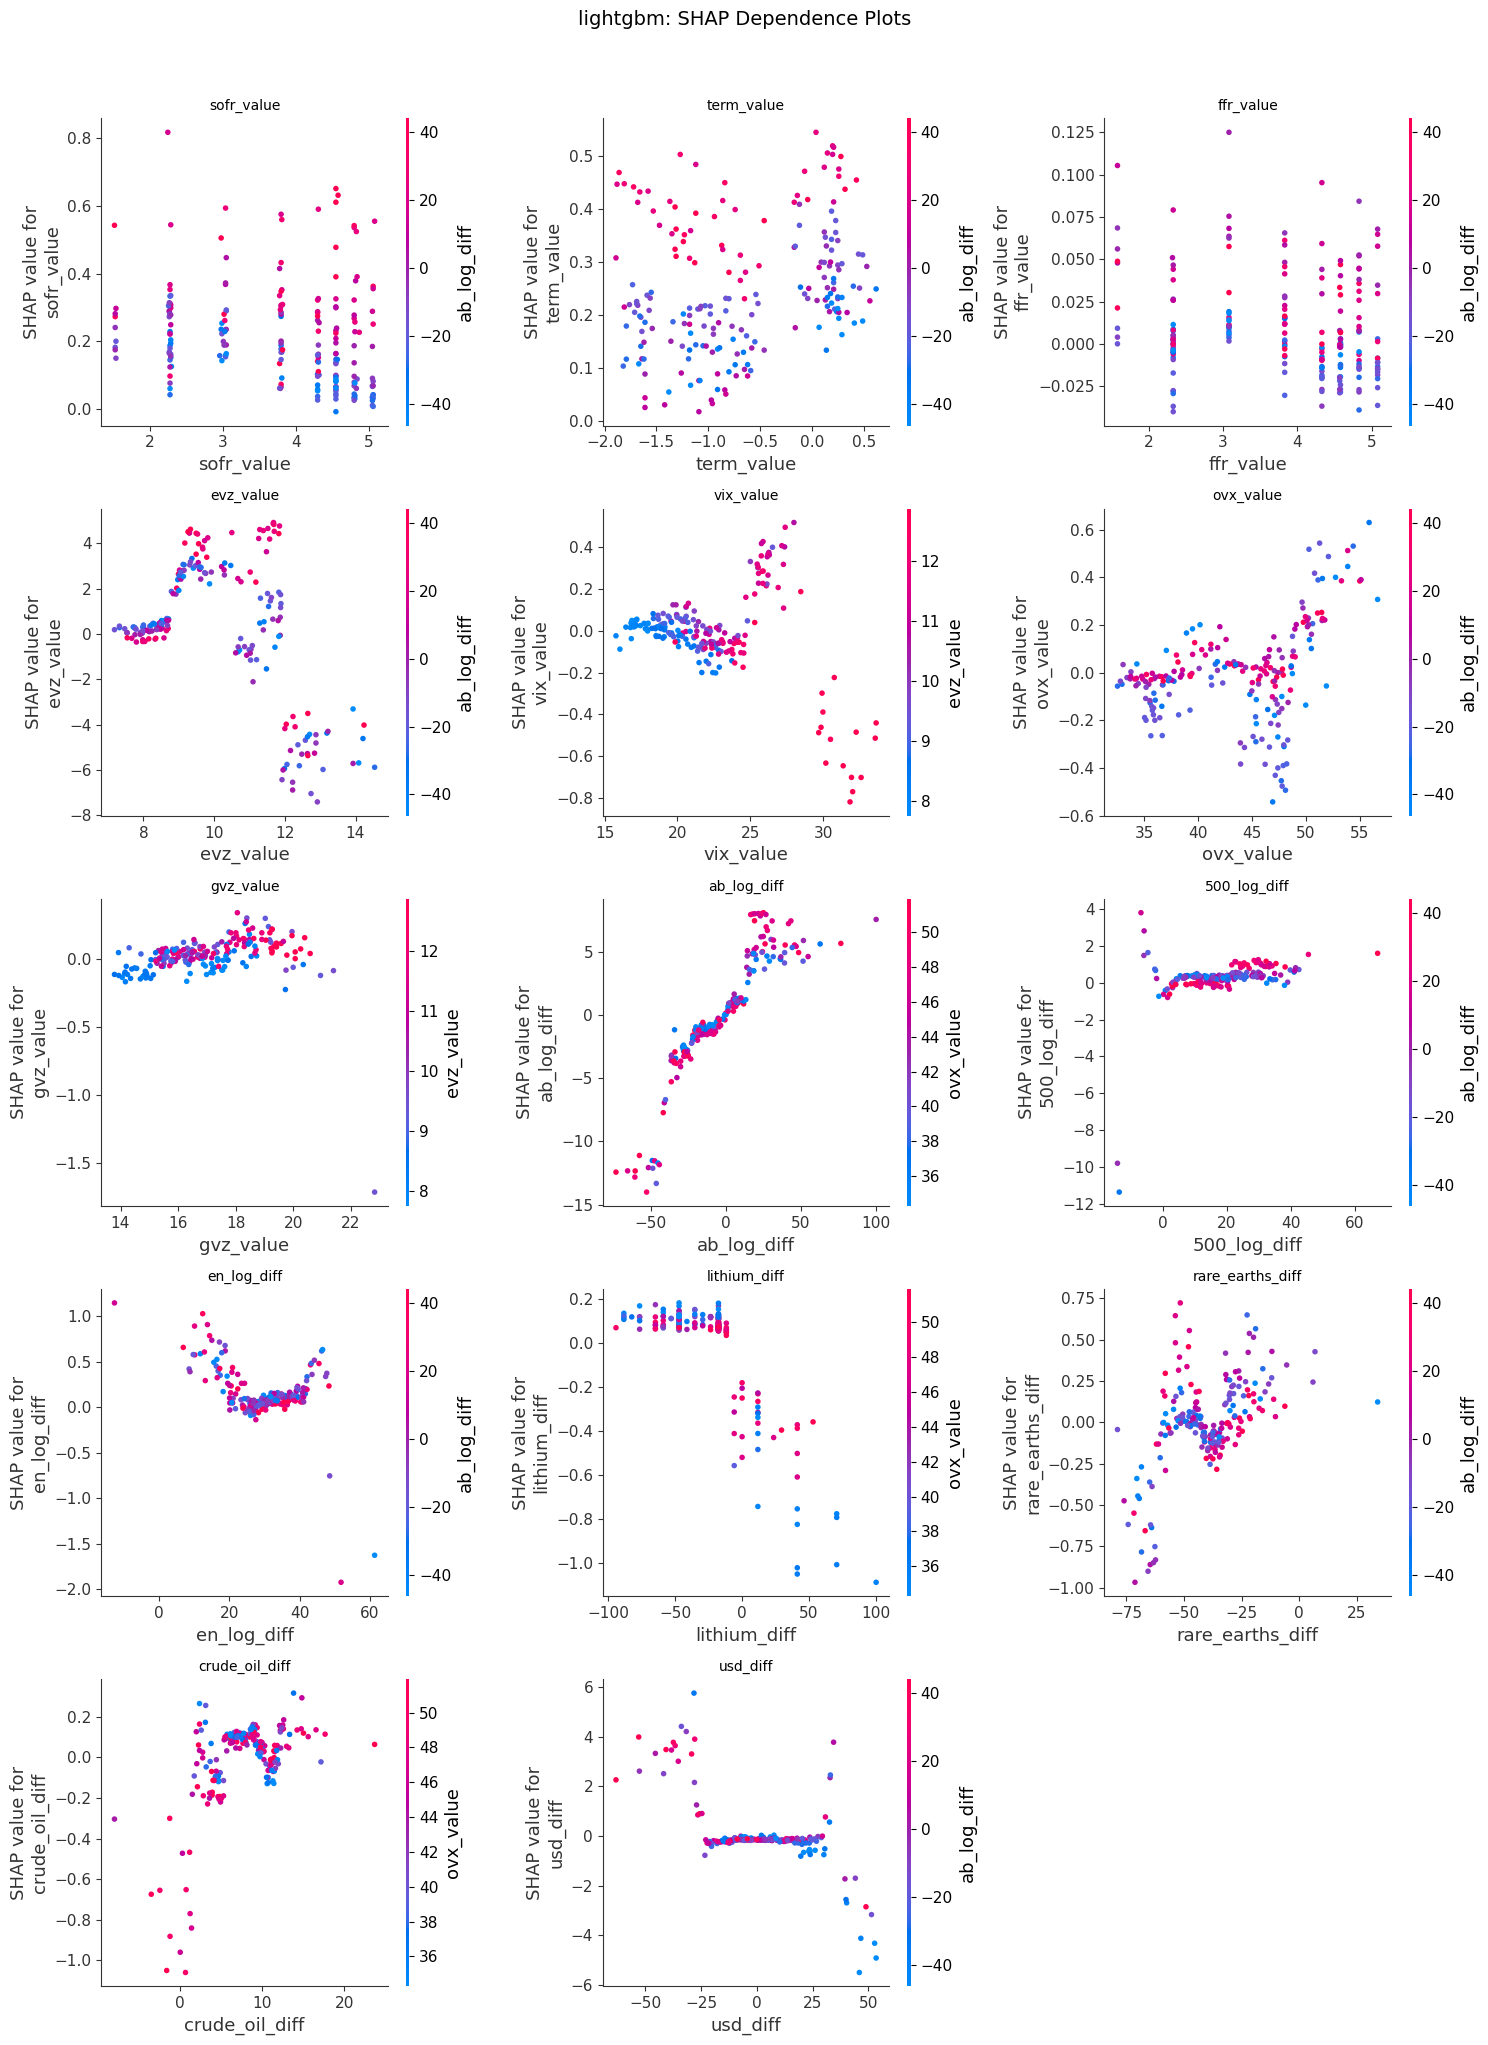

4. Heatmap ordered by predictions


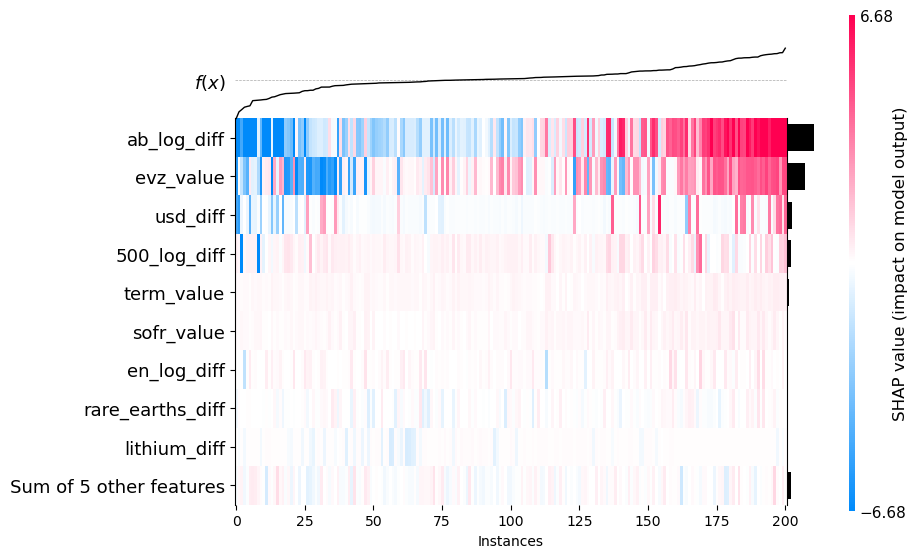

In [14]:
shap_covid = my_functions.shap_analysis_complete(model_lightgbm_covid, X_train_covid,  X_test_covid, 
                                model_name="lightgbm", n_cols=3)

#### Post Covid Time Period

1. Beeswarm plot


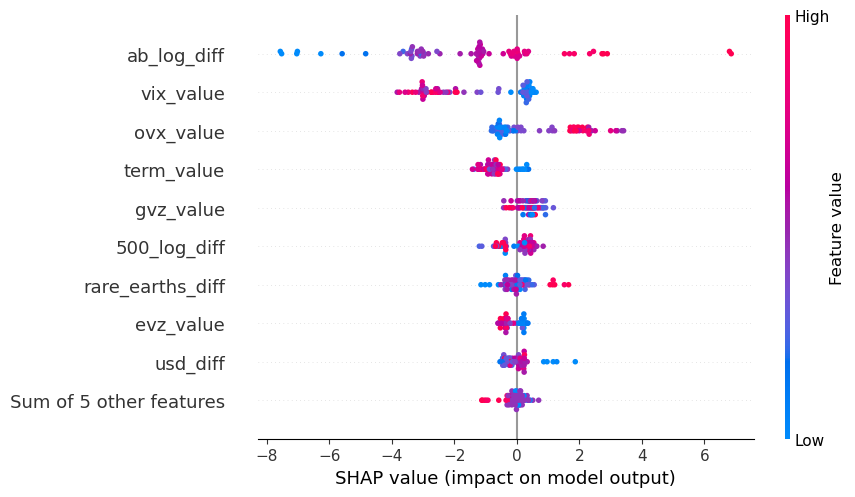

2. Feature importance bar plot


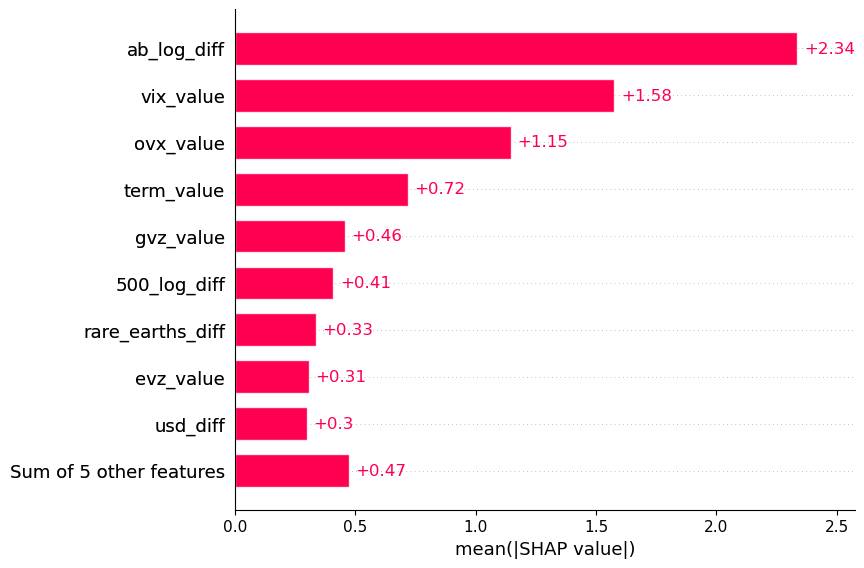

3. Dependence plots grid


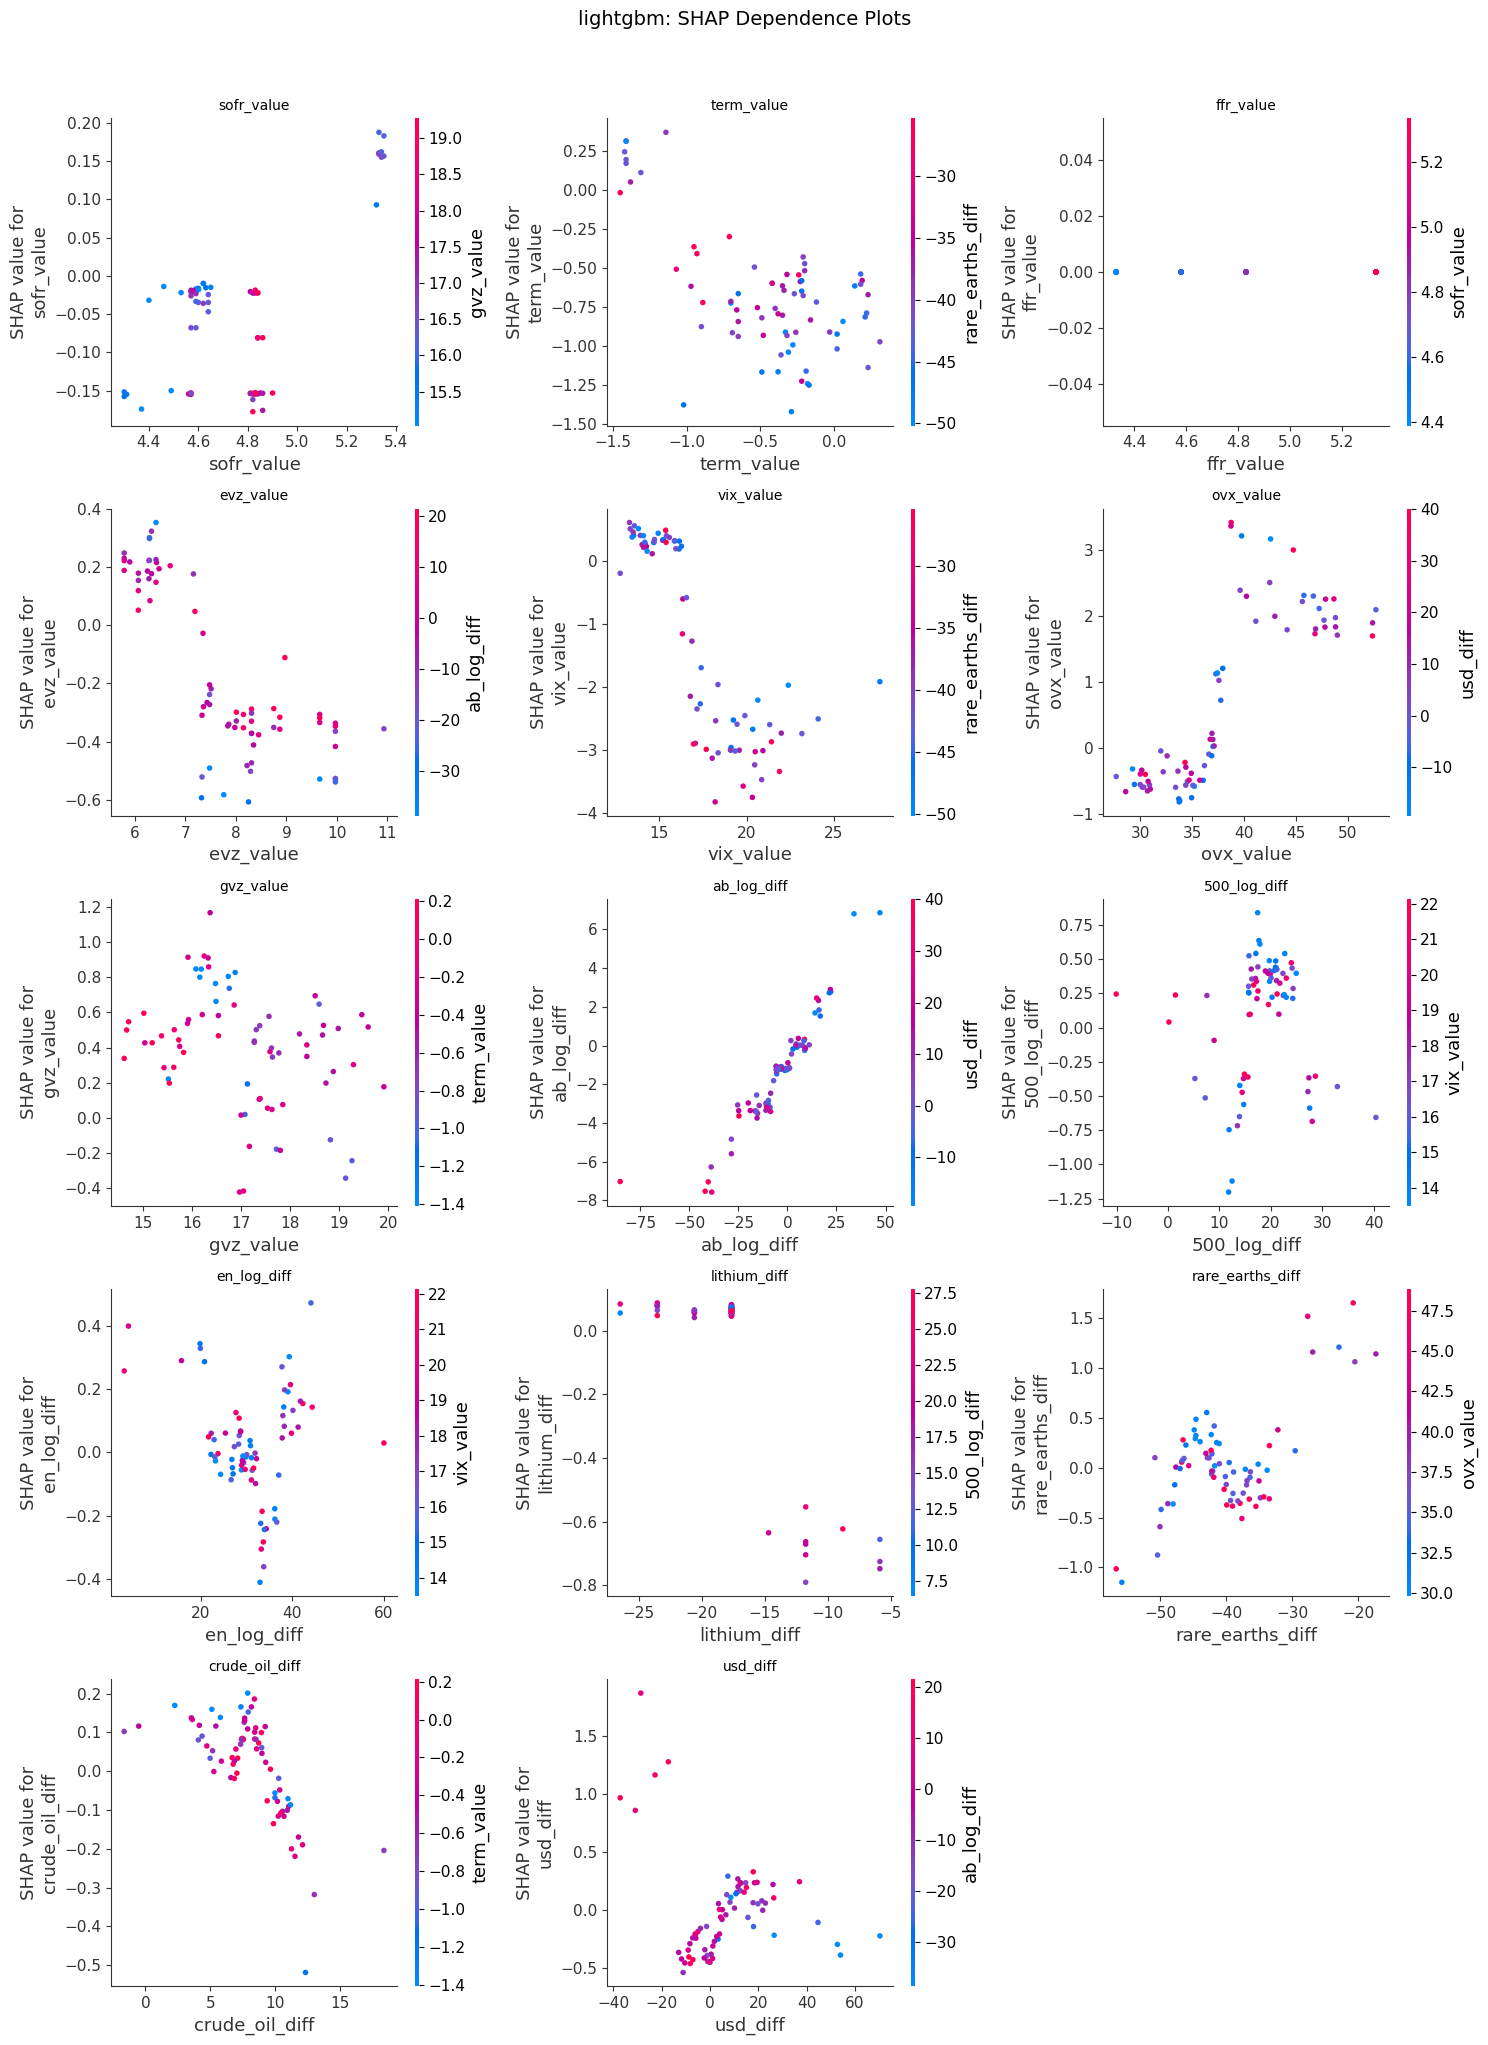

4. Heatmap ordered by predictions


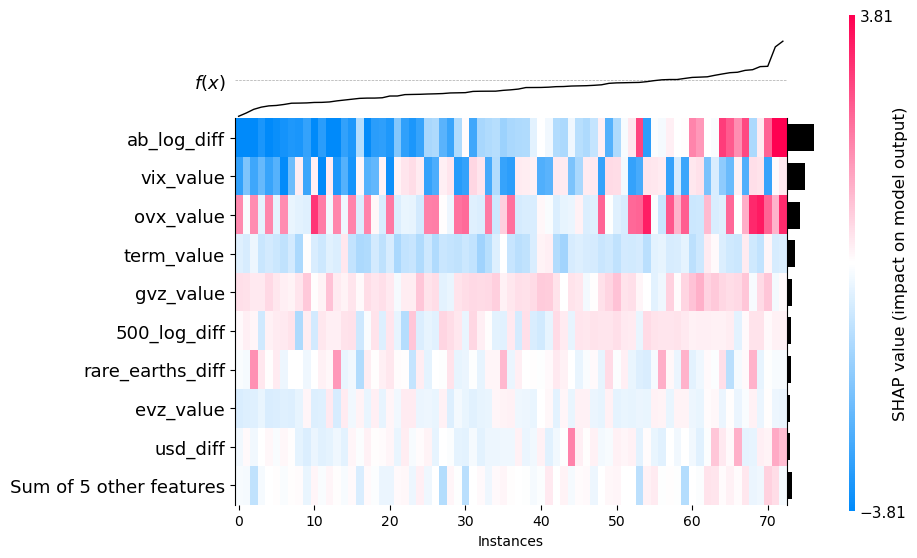

In [15]:
shap_post_covid = my_functions.shap_analysis_complete(model_lightgbm_post_covid, X_train_post_covid, X_test_post_covid, 
                                model_name="lightgbm", n_cols=3)

#### Full Time Period

1. Beeswarm plot


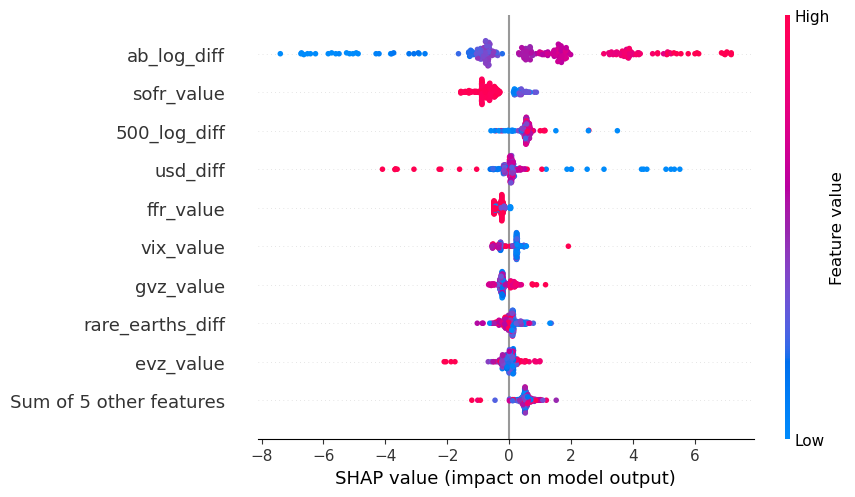

2. Feature importance bar plot


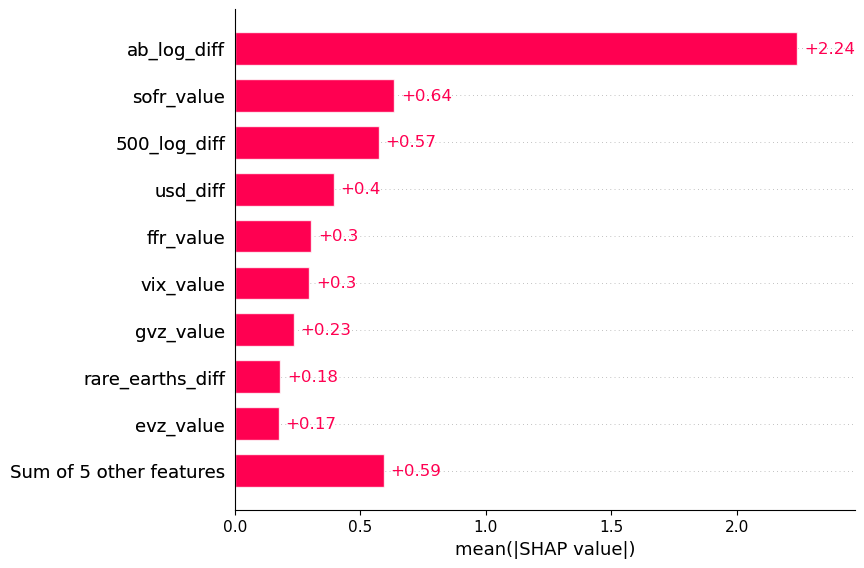

3. Dependence plots grid


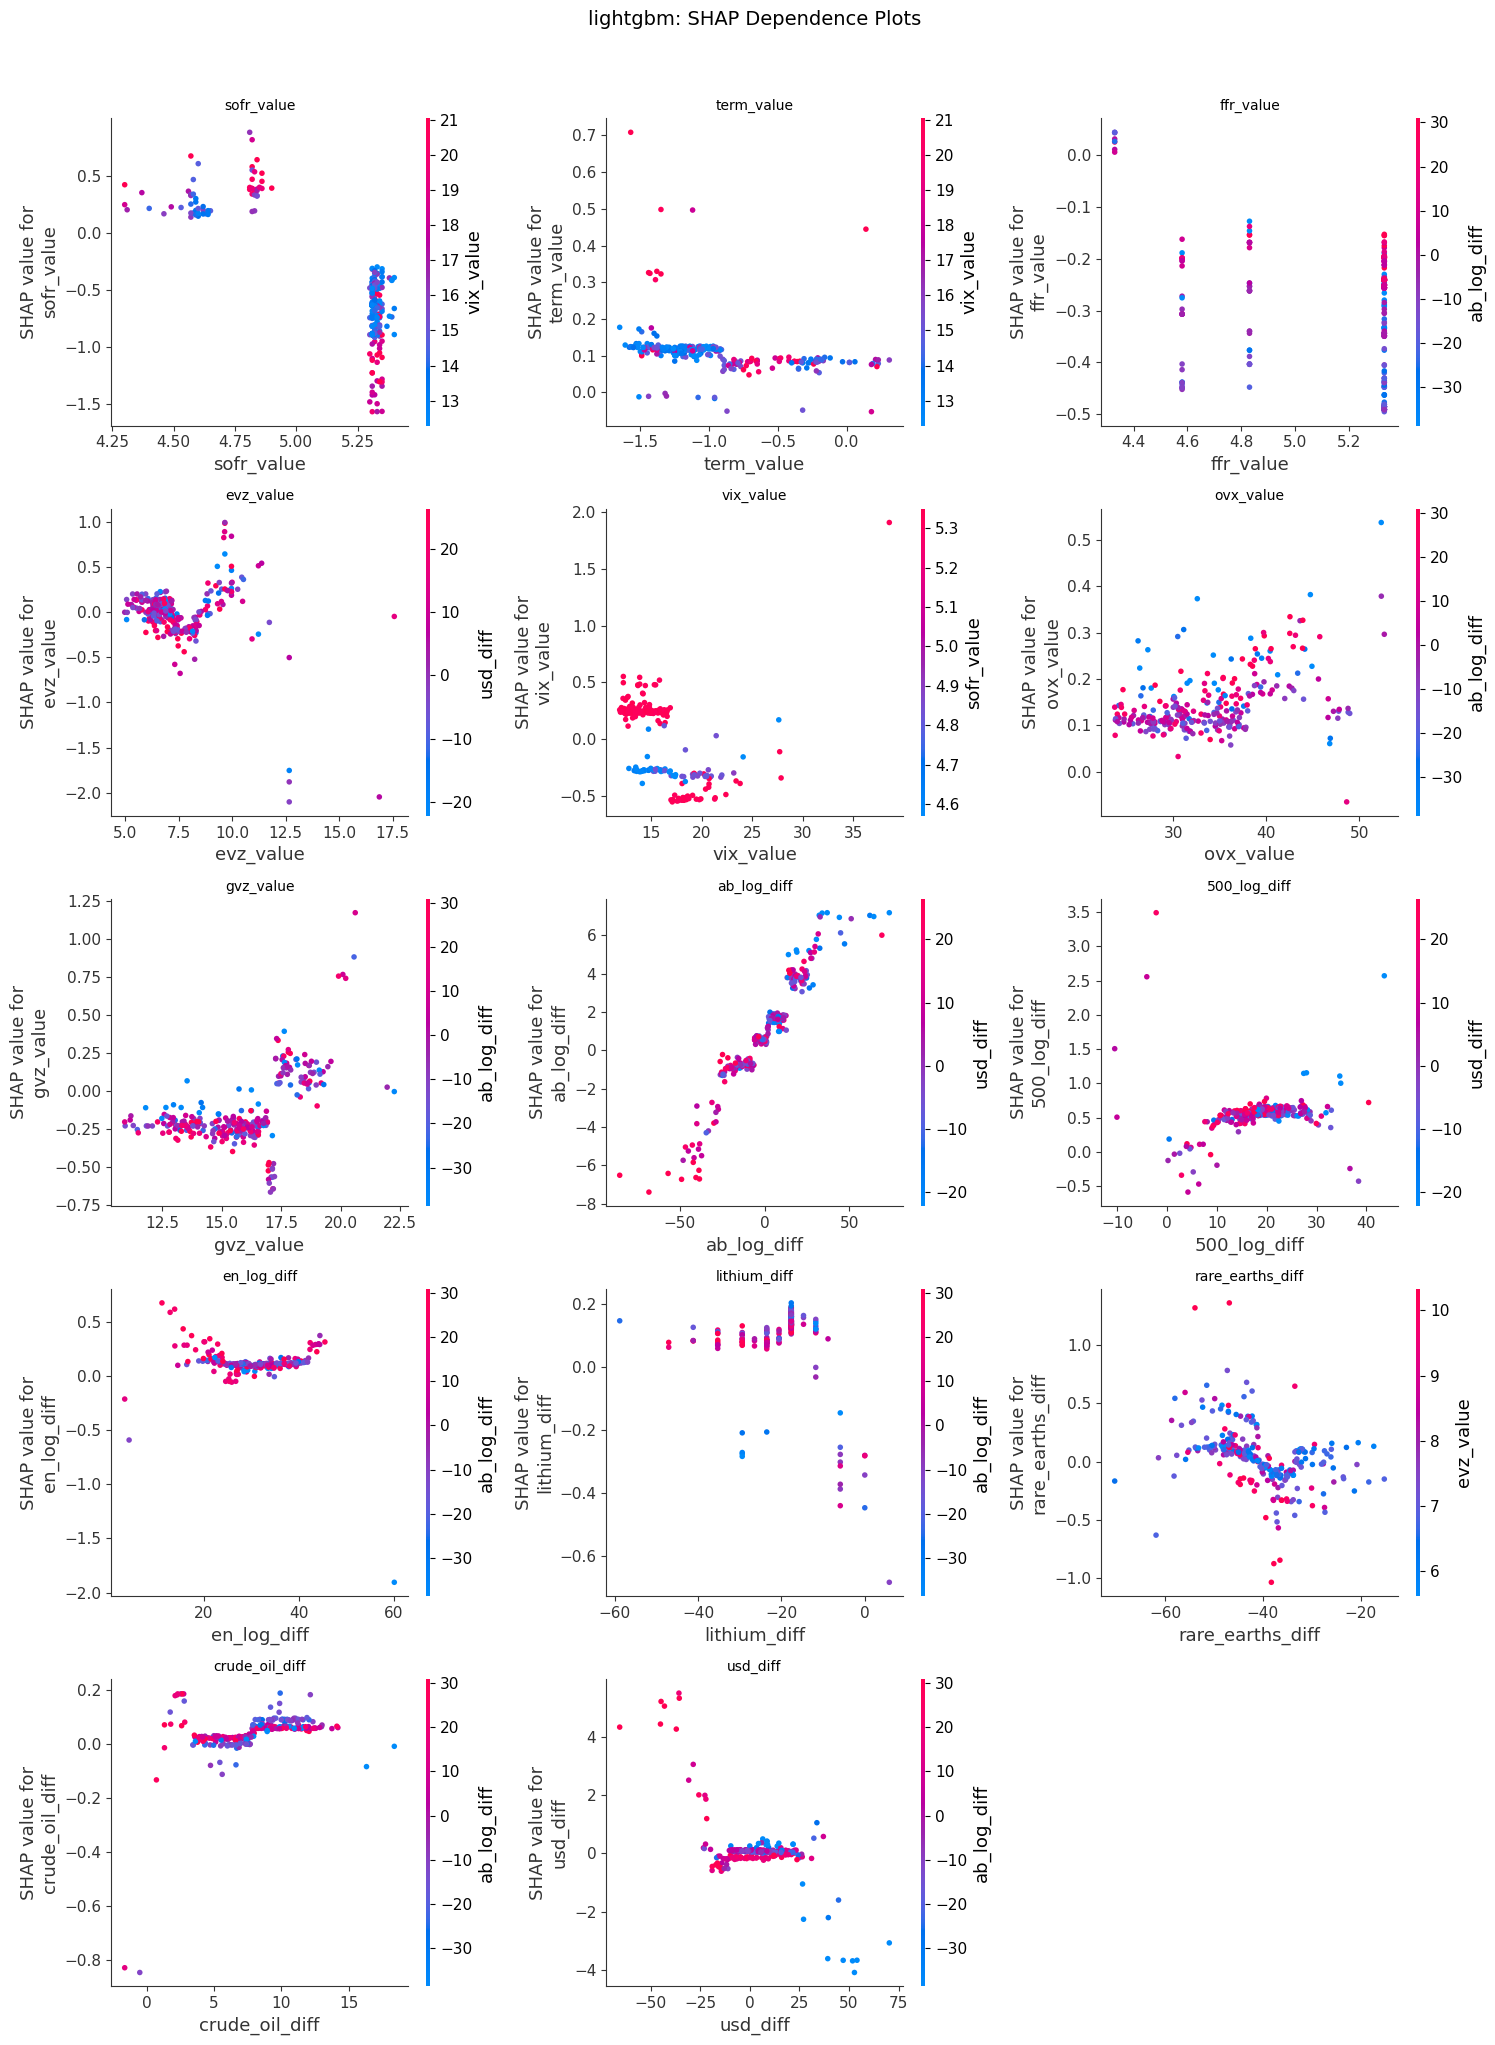

4. Heatmap ordered by predictions


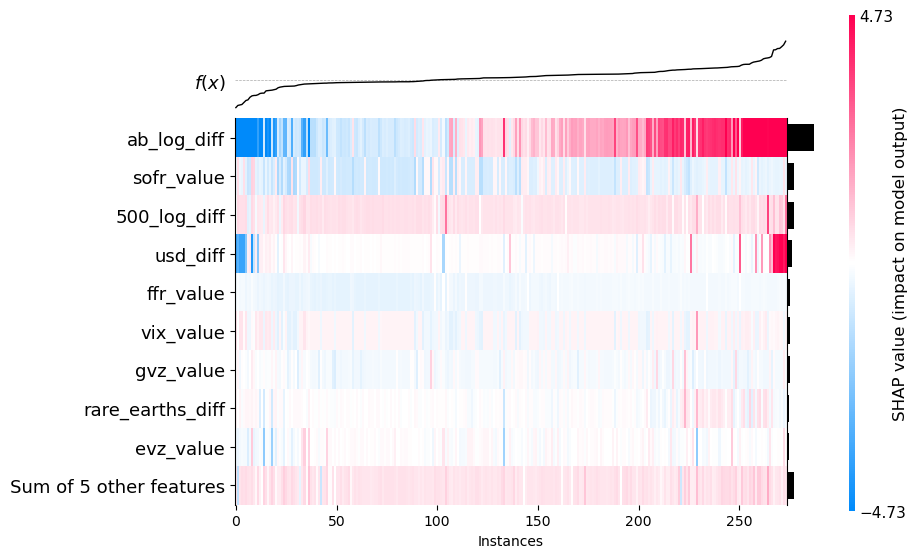

In [16]:
shap_full = my_functions.shap_analysis_complete(model_lightgbm_full, X_train_full, X_test_full, 
                                model_name="lightgbm", n_cols=3)